# Generating 3D Audio with Head Related Transfer Functions (HRTFs)

I made a script to make regular audio sound 3D

Back around 2012 I saw this demo on YouTube about a “Virtual Barber
Shop”. When listened to with headphones, the actors are able to move
around the listener as if they were in the room with you.

It’s actually still up (at the time of writing). Worth a listen if
you’ve never heard it before.

<https://www.youtube.com/embed/IUDTlvagjJA>

Hearing this for the first time was what I imagine it was like for
people to see color movies and TV for the first time.

More recently (during Covid boredom) I wanted to look more deeply into
how this sort of audio could be made and to see if there was a way to do
it without buying expensive hardware.

Often the explanation people give is that this is an example of
“binaural audio” where microphones are placed inside a dummy head (like
the one pictured below) so that the differences heard between the left
and right ear are interpreted as directions.

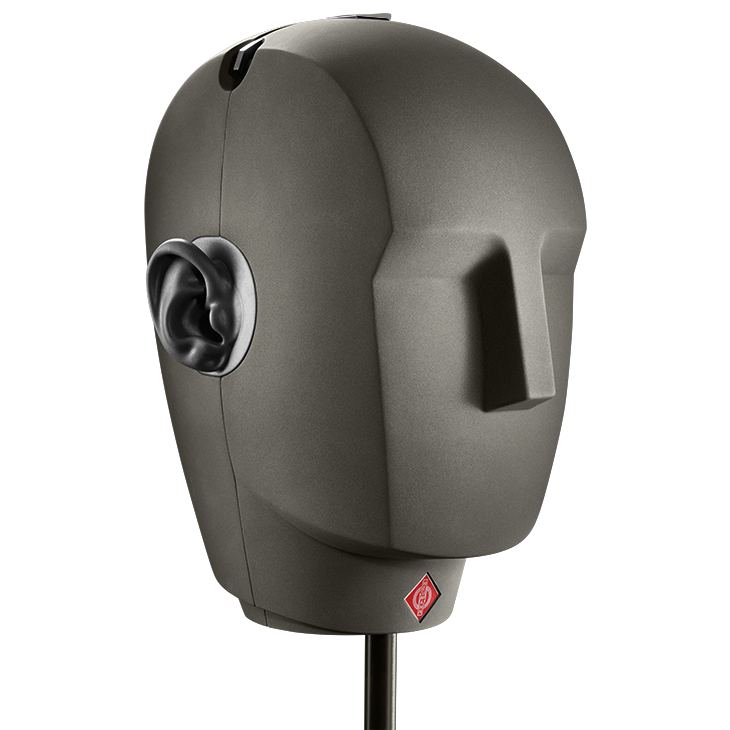

This certainly plays a part but is not the whole story. The problem with
that explanation is that it doesn’t explain why you can tell when a
sound comes from above or below you. In those cases, the sounds entering
your left and right ear could be the exact same yet you can still
localize the sound in the correct direction. The same goes for when a
sound is directly in front or behind you. Simply adding delay to one
side or the other is not sufficient to encode all of the spatial data.

The frequency content of the sounds themselves are subject to different
transfer functions that are a function of the relative position of the
sound origin to your head, the shape and composition of your head, the
shape of your ears, the room your in, and a variety of other factors.

These Head Related Transfer Functions (HRTFs) can be modeled and
measured. In fact there is a convenient online database filled with many
examples. Generally these transfer functions are stored as an array of
pairs of impulse responses (one for each ear). Convolving these impulse
responses with any audio file lets you make the audio sound like it’s
coming from somewhere in space.

These impulse responses are generally collected over the surface of
multiple spheres at many distances from the listener.

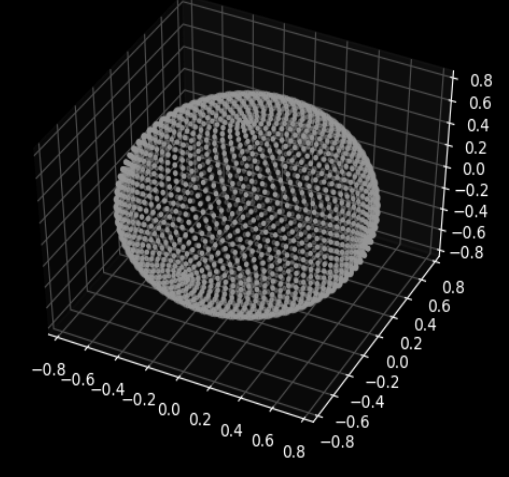

Below is an example implementation I made using Bernschütz (2013). The
code can be found on my github page
[here](https://github.com/aechoi/hrtfmixer).

<https://www.youtube.com/watch?v=4adjCVjJX5k>

In it, I use a method found in Gamper (2013) to search for and
interpolate the HRIRs. The method involves triangulating (tetrating?)
the space using Delaunay triangulation. Then, given some starting
tetrahedron, determine which vertex is furthest from the desired point
in space. The tetrahedron that shares the face opposite that vertex is
then the next nearest of the neighboring tetrahedrons. This process is
continued until the desired point lies within the current tetrahedron.

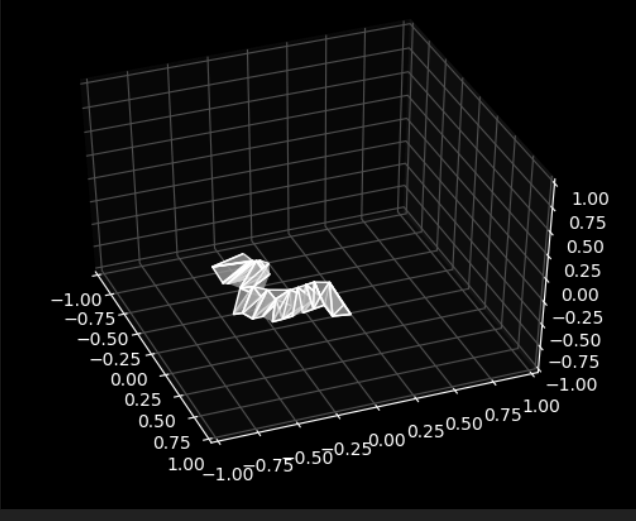

Once found, the HRIRs at the vertices of that tetrahedron can be
interpolated together using barycentric interpolation, providing a
smooth transition when the point moves across the space to other
tetrahedrons. The audio can now be convolved with the appropriate HRIR.

When I first worked on this project back in 2020, I just had a little
GUI that the user could interact with (as seen in the video above).
Later on, I wanted to make a more hands-free way to move the audio
around that could be used when on a call, streaming, or recording video.

I implemented some head tracking and mapped the location of the face in
the frame to control the source location using OpenCV and MediaPipe.
Below is a quick demo. The code can be found on [my
repo](https://github.com/aechoi/head_tracking_HRTF).

<https://www.youtube.com/watch?v=0wei2It-2oM>

Ultimately I was hoping that I could prank some of my coworkers in our
online meetings, but it turns out most VOIP software streams mono audio
to save on network bandwidth.

## 1 References

Bernschütz, Benjamin. 2013. “A Spherical Far Field HRIR/HRTF Compilation
of the Neumann KU 100.” In *Proceedings of the AIA-DAGA Conference on
Acoustics*. Merano, Italy.
<http://audiogroup.web.th-koeln.de/FILES/AIA-DAGA2013_HRIRs.pdf>.

Gamper, Hannes. 2013. “Head-Related Transfer Function Interpolation in
Azimuth, Elevation, and Distance.” *The Journal of the Acoustical
Society of America* 134 (6): 3761–72.
<https://doi.org/10.1121/1.4828983>.

------------------------------------------------------------------------

> **Edit History**
>
> -   **2025-07-31**: Reformatted for new site

------------------------------------------------------------------------